In [1]:
import pkg_resources
try:
    pkg_resources.require(['eth-ape','ape-alchemy','ape-etherscan','mplfinance', 'pandas', 'numpy', 'python-dotenv'])
    print('All packages installed')
except:
    !pip3 install eth-ape ape-alchemy ape-etherscan mplfinance pandas numpy python-dotenv

All packages installed


In [2]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import typing as tp
from ape import accounts, chain, Contract, networks

In [3]:
# manually input your keys like this
# %env WEB3_ALCHEMY_API_KEY = xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
# %env ETHERSCAN_API = xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

# or load from a separate ".env" file, which is more secure!
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
context = networks.parse_network_choice('ethereum:mainnet:alchemy')
context.provider.config
context.__enter__()

network_choice: ethereum:mainnet:alchemy provider_settings: None


<alchemy chain_id=1>

In [5]:
# get account 0
dev = accounts.test_accounts[0]
dev

<TestAccount 0x1e59ce931B4CFea3fe4B875411e280e173cB7A9C>

In [6]:
# get the balance of account 0
dev.balance

0

In [7]:
current_block = chain.blocks[-1].number
current_block

16064431

In [8]:
# determine starting block for the query
dblocks = int(86400*90/12) # last 180 d
start_block = current_block - dblocks
start_block

15416431

In [9]:
curve_steth = Contract("0xDC24316b9AE028F1497c275EB9192a3Ea0f67022")
curve_steth

<Vyper_contract 0xDC24316b9AE028F1497c275EB9192a3Ea0f67022>

In [10]:
steth = Contract("0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84")
steth

<Lido 0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84>

In [11]:
steth.balanceOf(curve_steth)

397507691272153177772598

In [12]:
curve_steth.TokenExchange

TokenExchange(address indexed buyer, int128 sold_id, uint256 tokens_sold, int128 bought_id, uint256 tokens_bought)

In [13]:
type(curve_steth.TokenExchange)

ape.contracts.base.ContractEvent

In [14]:
%time query_swaps_recent = curve_steth.TokenExchange.query("*", start_block=current_block-3000) # last 10 hr
query_swaps_recent

INFO: Cache database has not been initialized
CPU times: total: 31.2 ms
Wall time: 410 ms


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x5d3d97db3df55d642f3893a2c402add26c740c746d10...,16061564,0xdb3841bc6b098f04d0e7b241090d880cb46ad5172d11...,124,77
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x55B916Ce078eA594c10a874ba67eCc3d6...,0x1ae675673d2538c7ae7434fddf7c075d47d493a899e0...,16061567,0xde0f0c73e09d97e94e9536d56808afdff34223509df2...,75,64
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x55B916Ce078eA594c10a874ba67eCc3d6...,0x335d9359aeba49b2b810ce581447008b48ef3ffe0bd5...,16061586,0x5f93454236e90f463215e6c46d8c5713b029119c65fa...,138,69
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xBB3bAe51EAa44Cf060Cd60e1A5149ad22...,0x58004bb9b4e6f6d8f1a294419a9c5317975d9f0fa2b7...,16061608,0x9d2f22a1dfd91bd6d894ee56522d1cb05ebf004bee43...,271,149
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...,0xba3b45e8d73764a3c469fb851bdbb26094d8175fcf25...,16061630,0x922b263911e89c0274ad4e2ddefc1c27d0f4c95942ef...,10,0
...,...,...,...,...,...,...,...,...
62,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x6d691b802a291725ea54a8780d6a2dc385381ed4abfb...,16063860,0x21b9d0d4233fa2fad4b5d6e10546a0b90b17e56befde...,154,75
63,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x32c834dbe6d1602c2b71cdfc610fc6ffb5a1c2d149fc...,16063938,0x53a7deba9e187d07f760c165de195bad894827c33aca...,74,43
64,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x28F7c0614ebbFD1b83fB6803E0CA61453...,0x31263a9bdb491cf684b9d39ede747c2fceb46b145564...,16063985,0x343921860019d638ba4fc3a7f02299f727fba2580ab8...,35,21
65,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x58B03f7Cbf54293a426A8FF4E94d9891A...,0xaaf6ff779abe49415b2061d096cdf16dc6fce85829e0...,16064399,0x842c78b3ec1dddba998396d13e5a239e8ac59ef4e561...,49,28


In [15]:
# sweet, very cool :)
type(query_swaps_recent)

pandas.core.frame.DataFrame

In [16]:
# take a deeper dive into event arguments column. it's a pandas series
query_swaps_recent["event_arguments"][:10]

0    {'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...
1    {'buyer': '0x55B916Ce078eA594c10a874ba67eCc3d6...
2    {'buyer': '0x55B916Ce078eA594c10a874ba67eCc3d6...
3    {'buyer': '0xBB3bAe51EAa44Cf060Cd60e1A5149ad22...
4    {'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...
5    {'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...
6    {'buyer': '0x55B916Ce078eA594c10a874ba67eCc3d6...
7    {'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...
8    {'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...
9    {'buyer': '0x53222470CdcfB8081C0E3a50fd106f0D6...
Name: event_arguments, dtype: object

In [17]:
type(query_swaps_recent["event_arguments"])

pandas.core.series.Series

In [18]:
query_swaps_recent["event_arguments"].iloc[-1]

{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85C178C18',
 'sold_id': 1,
 'tokens_sold': 1580911535521578482,
 'bought_id': 0,
 'tokens_bought': 1554607356879844910}

In [19]:
# ok great. let's look a bit further into the past to start_block from above. see how long it takes
%time query_swaps_original = curve_steth.TokenExchange.query("*", start_block=start_block)
query_swaps_original

INFO: Alchemy compute units exceeded, retrying, attempt #1/3 in 1000 ms
CPU times: total: 5.42 s
Wall time: 14.8 s


,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xa89817667ef3c4d29f466ba5d86883d1dc56210dedf5...,15416489,0x44ce4f38f4a0ea1b3c07ce9082b9ca7cfe97be853110...,71,28
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x5c22e81ed97e21ab93b06af3215133c875ec022b629b...,15416496,0x215df2f2e8c19ff1e12646d794a0910abb13bb189728...,150,182
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x228dda28769f26eb865d6ec35a329ba8b2b17f3d3b05...,15416522,0x2b2d0253b39f1a7b7f43c4e246a71a23854d364a3bac...,209,54
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0x8bb0c70932180664566842b92957bb7d29904d056b18...,15416552,0x6caa37832b07a45bcd637867e96758dee9f09ccd07ca...,70,36
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xB85425D1988A2b8008863Fe24167847d0...,0x6c7ef16f00952810ff4682da863f1c78145a2e20a9c2...,15416798,0x1eec4f4ba55dc3423069c01ff051375161e6671c9137...,241,187
...,...,...,...,...,...,...,...,...
18786,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x6d691b802a291725ea54a8780d6a2dc385381ed4abfb...,16063860,0x21b9d0d4233fa2fad4b5d6e10546a0b90b17e56befde...,154,75
18787,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x32c834dbe6d1602c2b71cdfc610fc6ffb5a1c2d149fc...,16063938,0x53a7deba9e187d07f760c165de195bad894827c33aca...,74,43
18788,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x28F7c0614ebbFD1b83fB6803E0CA61453...,0x31263a9bdb491cf684b9d39ede747c2fceb46b145564...,16063985,0x343921860019d638ba4fc3a7f02299f727fba2580ab8...,35,21
18789,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x58B03f7Cbf54293a426A8FF4E94d9891A...,0xaaf6ff779abe49415b2061d096cdf16dc6fce85829e0...,16064399,0x842c78b3ec1dddba998396d13e5a239e8ac59ef4e561...,49,28


In [20]:
query_swaps = query_swaps_original.copy()

In [21]:
# get coin indices:
#  - 0 = ETH (native)
#  - 1 = stETH
coin_indices = [curve_steth.coins(i) for i in range(2)]
coin_indices

['0xEeeeeEeeeEeEeeEeEeEeeEEEeeeeEeeeeeeeEEeE',
 '0xae7ab96520DE3A18E5e111B5EaAb095312D7fE84']

In [22]:
steth.address == coin_indices[-1]

True

In [23]:
# cache the fee to calculate associated price correctly (prior to fees applied)
curve_steth_fee = curve_steth.fee() / 1e10  # fee denom is 1e10
curve_steth_fee

0.0004

In [24]:
# if sold_id == 1, then selling stETH for ETH, which is price wanted
#  i.e. quote = <ETH>, base = <stETH>
last_swap = query_swaps["event_arguments"].iloc[-1]
print('last swap event:', last_swap)

last_price = last_swap['tokens_bought'] * (1+curve_steth_fee) / last_swap['tokens_sold']
if last_swap['sold_id'] == 0:
    last_price = 1 / last_price
print('price:', last_price)

last swap event: {'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85C178C18', 'sold_id': 1, 'tokens_sold': 1580911535521578482, 'bought_id': 0, 'tokens_bought': 1554607356879844910}
price: 0.9837547293938186


In [25]:
# write a function that iterates over event_arguments to calculate marginal price from last token swap
def get_price(event_args: dict) -> float:
    price = event_args['tokens_bought'] * (1+curve_steth_fee) / event_args['tokens_sold']
    if event_args['sold_id'] == 0:
        price = 1 / price
    return price

In [26]:
# validate with logic in cell above for last price
get_price(query_swaps["event_arguments"].iloc[-1]) == last_price

True

In [27]:
# create new column with marginal price (stETH as base and ETH as quote, so should be at a discount)
query_swaps['price (STETH/ETH)'] = query_swaps['event_arguments'].apply(get_price)
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH)
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xa89817667ef3c4d29f466ba5d86883d1dc56210dedf5...,15416489,0x44ce4f38f4a0ea1b3c07ce9082b9ca7cfe97be853110...,71,28,0.970744
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x5c22e81ed97e21ab93b06af3215133c875ec022b629b...,15416496,0x215df2f2e8c19ff1e12646d794a0910abb13bb189728...,150,182,0.970742
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x228dda28769f26eb865d6ec35a329ba8b2b17f3d3b05...,15416522,0x2b2d0253b39f1a7b7f43c4e246a71a23854d364a3bac...,209,54,0.970576
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0x8bb0c70932180664566842b92957bb7d29904d056b18...,15416552,0x6caa37832b07a45bcd637867e96758dee9f09ccd07ca...,70,36,0.970576
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xB85425D1988A2b8008863Fe24167847d0...,0x6c7ef16f00952810ff4682da863f1c78145a2e20a9c2...,15416798,0x1eec4f4ba55dc3423069c01ff051375161e6671c9137...,241,187,0.970542
...,...,...,...,...,...,...,...,...,...
18786,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x6d691b802a291725ea54a8780d6a2dc385381ed4abfb...,16063860,0x21b9d0d4233fa2fad4b5d6e10546a0b90b17e56befde...,154,75,0.983758
18787,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x32c834dbe6d1602c2b71cdfc610fc6ffb5a1c2d149fc...,16063938,0x53a7deba9e187d07f760c165de195bad894827c33aca...,74,43,0.983749
18788,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x28F7c0614ebbFD1b83fB6803E0CA61453...,0x31263a9bdb491cf684b9d39ede747c2fceb46b145564...,16063985,0x343921860019d638ba4fc3a7f02299f727fba2580ab8...,35,21,0.983756
18789,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x58B03f7Cbf54293a426A8FF4E94d9891A...,0xaaf6ff779abe49415b2061d096cdf16dc6fce85829e0...,16064399,0x842c78b3ec1dddba998396d13e5a239e8ac59ef4e561...,49,28,0.983755


<AxesSubplot:xlabel='block_number'>

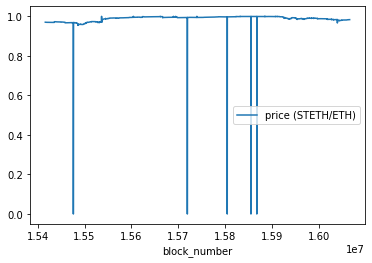

In [28]:
query_swaps.plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

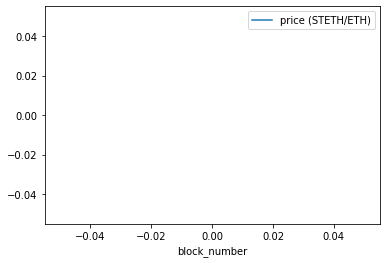

In [29]:
# well those are weird dips and spikes. look at smooth parts
query_swaps[(query_swaps['block_number'] > 15100000) & (query_swaps['block_number'] < 15200000)].plot(x='block_number', y='price (STETH/ETH)')

<AxesSubplot:xlabel='block_number'>

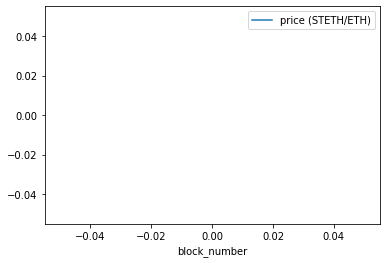

In [30]:
# weird spike for swaps back to 1.000 exchange rate. should look at this in event df
query_swaps[(query_swaps['block_number'] > 15131500) & (query_swaps['block_number'] < 15133000)].plot(x='block_number', y='price (STETH/ETH)')

In [31]:
# first, unfold event arguments into separate columns
def unfold_event_args(key: str, event_args: dict):
    return event_args[key]

for key in query_swaps.iloc[-1]['event_arguments'].keys():
    query_swaps[key] = query_swaps['event_arguments'].apply(lambda ev: unfold_event_args(key, ev))

In [32]:
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xa89817667ef3c4d29f466ba5d86883d1dc56210dedf5...,15416489,0x44ce4f38f4a0ea1b3c07ce9082b9ca7cfe97be853110...,71,28,0.970744,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,1,1000000000000000000,0,970356027731068435
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x5c22e81ed97e21ab93b06af3215133c875ec022b629b...,15416496,0x215df2f2e8c19ff1e12646d794a0910abb13bb189728...,150,182,0.970742,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,1,568987440689300166,0,552118922905163807
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x228dda28769f26eb865d6ec35a329ba8b2b17f3d3b05...,15416522,0x2b2d0253b39f1a7b7f43c4e246a71a23854d364a3bac...,209,54,0.970576,0xDEF171Fe48CF0115B1d80b88dc8eAB59176FEe57,1,1043552394419972378,0,1012442215896741785
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0x8bb0c70932180664566842b92957bb7d29904d056b18...,15416552,0x6caa37832b07a45bcd637867e96758dee9f09ccd07ca...,70,36,0.970576,0xfA9a30350048B2BF66865ee20363067c66f67e58,1,1009912983842024676,0,979805332306035750
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xB85425D1988A2b8008863Fe24167847d0...,0x6c7ef16f00952810ff4682da863f1c78145a2e20a9c2...,15416798,0x1eec4f4ba55dc3423069c01ff051375161e6671c9137...,241,187,0.970542,0xB85425D1988A2b8008863Fe24167847d0350981a,1,212843572202833648204,0,206491123822738232084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18786,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x6d691b802a291725ea54a8780d6a2dc385381ed4abfb...,16063860,0x21b9d0d4233fa2fad4b5d6e10546a0b90b17e56befde...,154,75,0.983758,0xDEF171Fe48CF0115B1d80b88dc8eAB59176FEe57,0,1986824539956647600,1,2018820130487909105
18787,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x32c834dbe6d1602c2b71cdfc610fc6ffb5a1c2d149fc...,16063938,0x53a7deba9e187d07f760c165de195bad894827c33aca...,74,43,0.983749,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,0,2854153967809427,1,2900143422520130
18788,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x28F7c0614ebbFD1b83fB6803E0CA61453...,0x31263a9bdb491cf684b9d39ede747c2fceb46b145564...,16063985,0x343921860019d638ba4fc3a7f02299f727fba2580ab8...,35,21,0.983756,0x28F7c0614ebbFD1b83fB6803E0CA61453D3E32B9,1,1000000000000000000,0,983362439515918813
18789,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x58B03f7Cbf54293a426A8FF4E94d9891A...,0xaaf6ff779abe49415b2061d096cdf16dc6fce85829e0...,16064399,0x842c78b3ec1dddba998396d13e5a239e8ac59ef4e561...,49,28,0.983755,0x58B03f7Cbf54293a426A8FF4E94d9891AFDE7b69,1,3194958453078403806,0,3141800578587178741


In [33]:
# now, check swaps where price spikes up to 1 between blocks 15132100 and 15132400
query_swaps[(query_swaps['block_number'] > 15132100) & (query_swaps['block_number'] < 15132400)]

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought


In [34]:
# ahh, ok :) .. someones selling 1 wei into the pool (see e.g. block 15132225)
# which is causing rounding issues for price calc

<AxesSubplot:xlabel='block_number'>

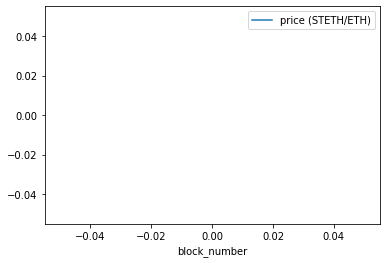

In [35]:
# are the dusting rounding issues also causing those spikes down to zero?
# look at first spike down to 0
query_swaps[(query_swaps['block_number'] > 14824600) & (query_swaps['block_number'] < 14825000)].plot(x='block_number', y='price (STETH/ETH)')

In [36]:
# looks like it (see swap at block 14824840); similar rounding issues except rounded down to zero here
query_swaps[(query_swaps['block_number'] > 14824600) & (query_swaps['block_number'] < 14825000)]

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought


In [37]:
# apply min size to swaps we care about to ignore the dustings
min_bought = 0.0001 * 1e18  # trade size must be > 0.0001 ETH 
query_swaps = query_swaps[query_swaps['tokens_bought'] > min_bought]

<AxesSubplot:xlabel='block_number'>

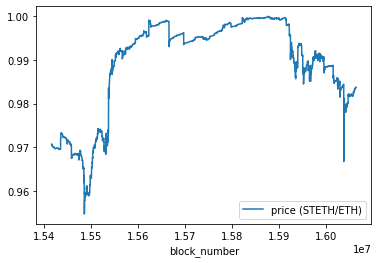

In [38]:
# nice! way better
query_swaps.plot(x='block_number', y='price (STETH/ETH)')

In [39]:
# should smooth the price data out so not so jittery by averaging over 1h for hourly candles.
# keep the volumes numbers as well, so make some slight changes to the (tokens_bought, tokens_sold)
# columns to instead track (volume_coin0, volume_coin1) at each swap

In [40]:
# write a function that returns volume on coin indices for a swap (normalized by 1e18 for decimals)
def get_volume(coin_index: int, x: pd.Series) -> (float, float):
    volume = x['tokens_sold'] if x['sold_id'] == coin_index else x['tokens_bought']
    volume = volume / 1e18
    return volume

In [41]:
%%capture
for coin_index in range(2):
    key = f'volume_coin{coin_index}'
    query_swaps[key] = query_swaps.apply(lambda x: get_volume(coin_index, x), axis=1)

In [42]:
query_swaps

,event_name,contract_address,event_arguments,transaction_hash,block_number,block_hash,log_index,transaction_index,price (STETH/ETH),buyer,sold_id,tokens_sold,bought_id,tokens_bought,volume_coin0,volume_coin1
0,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0xa89817667ef3c4d29f466ba5d86883d1dc56210dedf5...,15416489,0x44ce4f38f4a0ea1b3c07ce9082b9ca7cfe97be853110...,71,28,0.970744,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,1,1000000000000000000,0,970356027731068435,0.970356,1.000000
1,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xF2F400C138F9fb900576263af0BC7fCde...,0x5c22e81ed97e21ab93b06af3215133c875ec022b629b...,15416496,0x215df2f2e8c19ff1e12646d794a0910abb13bb189728...,150,182,0.970742,0xF2F400C138F9fb900576263af0BC7fCde2B1b8a8,1,568987440689300166,0,552118922905163807,0.552119,0.568987
2,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x228dda28769f26eb865d6ec35a329ba8b2b17f3d3b05...,15416522,0x2b2d0253b39f1a7b7f43c4e246a71a23854d364a3bac...,209,54,0.970576,0xDEF171Fe48CF0115B1d80b88dc8eAB59176FEe57,1,1043552394419972378,0,1012442215896741785,1.012442,1.043552
3,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xfA9a30350048B2BF66865ee20363067c6...,0x8bb0c70932180664566842b92957bb7d29904d056b18...,15416552,0x6caa37832b07a45bcd637867e96758dee9f09ccd07ca...,70,36,0.970576,0xfA9a30350048B2BF66865ee20363067c66f67e58,1,1009912983842024676,0,979805332306035750,0.979805,1.009913
4,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xB85425D1988A2b8008863Fe24167847d0...,0x6c7ef16f00952810ff4682da863f1c78145a2e20a9c2...,15416798,0x1eec4f4ba55dc3423069c01ff051375161e6671c9137...,241,187,0.970542,0xB85425D1988A2b8008863Fe24167847d0350981a,1,212843572202833648204,0,206491123822738232084,206.491124,212.843572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18786,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0xDEF171Fe48CF0115B1d80b88dc8eAB591...,0x6d691b802a291725ea54a8780d6a2dc385381ed4abfb...,16063860,0x21b9d0d4233fa2fad4b5d6e10546a0b90b17e56befde...,154,75,0.983758,0xDEF171Fe48CF0115B1d80b88dc8eAB59176FEe57,0,1986824539956647600,1,2018820130487909105,1.986825,2.018820
18787,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x22F9dCF4647084d6C31b2765F6910cd85...,0x32c834dbe6d1602c2b71cdfc610fc6ffb5a1c2d149fc...,16063938,0x53a7deba9e187d07f760c165de195bad894827c33aca...,74,43,0.983749,0x22F9dCF4647084d6C31b2765F6910cd85C178C18,0,2854153967809427,1,2900143422520130,0.002854,0.002900
18788,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x28F7c0614ebbFD1b83fB6803E0CA61453...,0x31263a9bdb491cf684b9d39ede747c2fceb46b145564...,16063985,0x343921860019d638ba4fc3a7f02299f727fba2580ab8...,35,21,0.983756,0x28F7c0614ebbFD1b83fB6803E0CA61453D3E32B9,1,1000000000000000000,0,983362439515918813,0.983362,1.000000
18789,TokenExchange,0xDC24316b9AE028F1497c275EB9192a3Ea0f67022,{'buyer': '0x58B03f7Cbf54293a426A8FF4E94d9891A...,0xaaf6ff779abe49415b2061d096cdf16dc6fce85829e0...,16064399,0x842c78b3ec1dddba998396d13e5a239e8ac59ef4e561...,49,28,0.983755,0x58B03f7Cbf54293a426A8FF4E94d9891AFDE7b69,1,3194958453078403806,0,3141800578587178741,3.141801,3.194958


In [43]:
# prep for smoothing by setting index to block number (choose last swap in block to represent price at block)
query_swaps_filtered = query_swaps.filter(['block_number', 'price (STETH/ETH)', 'volume_coin0', 'volume_coin1']).drop_duplicates('block_number', keep='last')
query_swaps_filtered = query_swaps_filtered.set_index('block_number')

In [44]:
# reindex by block number (1 block steps) and ffill price values 
new_index = range(query_swaps_filtered.index.min(), query_swaps_filtered.index.max()+1)
query_swaps_filtered = query_swaps_filtered.reindex(new_index).ffill()

In [45]:
# separate data into windows of 260 blocks (~ 1h)
# remove first (last_block - first_block) % window rows so even candle windows
window = 260
first_index = (query_swaps_filtered.index[-1] - query_swaps_filtered.index[0]) % window
query_swaps_filtered = query_swaps_filtered[first_index:]

In [46]:
# smooth data using mean over 260 blocks for ~ 1h candles
s = (query_swaps_filtered.index.to_series() / window).astype(int)
query_swaps_candled = query_swaps_filtered.groupby(s).agg({'price (STETH/ETH)': ['first', 'max', 'min', 'last', 'mean'], 'volume_coin0': 'sum', 'volume_coin1': 'sum'}).set_index(s.index[::window])
query_swaps_candled

price (STETH/ETH)                                          \
                         first       max       min      last      mean   
block_number                                                             
15416510              0.970742  0.970742  0.970576  0.970576  0.970586   
15416770              0.970576  0.970576  0.970453  0.970474  0.970511   
15417030              0.970474  0.970560  0.970474  0.970560  0.970511   
15417290              0.970560  0.970565  0.970482  0.970482  0.970541   
15417550              0.970482  0.970482  0.970482  0.970482  0.970482   
...                        ...       ...       ...       ...       ...   
16063390              0.983610  0.983611  0.983610  0.983611  0.983610   
16063650              0.983611  0.983759  0.983611  0.983758  0.983733   
16063910              0.983758  0.983758  0.983749  0.983756  0.983755   
16064170              0.983756  0.983756  0.983756  0.983756  0.983756   
16064430              0.983756  0.983756  0.983755  0.983755  0.983756   

              volume_coin0  volume_coin1  
                       sum           sum  
block_number                              
15416510        182.009883    187.601543  
15416770       4276.737389   4407.607879  
15417030       3824.591525   3939.235397  
15417290       5741.830617   5918.040179  
15417550        203.718975    209.888565  
...                    ...           ...  
16063390        145.161982    147.555331  
16063650      36398.597003  36987.950404  
16063910        347.816886    353.575013  
16064170        255.674234    260.000000  
16064430        137.301560    139.624624  

[2493 rows x 7 columns]

<AxesSubplot:xlabel='block_number'>

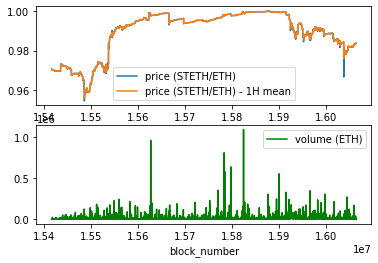

In [47]:
# make some fancy plots w subplots ...
fig, ax = plt.subplots(2, 1)
query_swaps.plot(x='block_number', y='price (STETH/ETH)', ax=ax[0])
query_swaps_candled['price (STETH/ETH)'].plot(y='mean', ax=ax[0], label='price (STETH/ETH) - 1H mean')
query_swaps_candled['volume_coin0'].plot(y='sum', color='g', ax=ax[1], label='volume (ETH)')

In [48]:
# plot the candles since that's dope :o

In [49]:
# get the timestamps every 24 candles (~ 24h) and interpolate the rest (SEE banteg gist again)
# NOTE: include last block in index for interp to work properly
T = 24
blocks = query_swaps_candled.index[::24].to_list() + [query_swaps_candled.index[-1]]

In [50]:
%time timestamps = [ chain.blocks[i].timestamp for i in blocks ]

CPU times: total: 406 ms
Wall time: 5.49 s


In [51]:
query_swaps_candled['timestamp'] = pd.to_datetime(np.interp(query_swaps_candled.index, blocks, timestamps) * 1e9)
query_swaps_candled

price (STETH/ETH)                                          \
                         first       max       min      last      mean   
block_number                                                             
15416510              0.970742  0.970742  0.970576  0.970576  0.970586   
15416770              0.970576  0.970576  0.970453  0.970474  0.970511   
15417030              0.970474  0.970560  0.970474  0.970560  0.970511   
15417290              0.970560  0.970565  0.970482  0.970482  0.970541   
15417550              0.970482  0.970482  0.970482  0.970482  0.970482   
...                        ...       ...       ...       ...       ...   
16063390              0.983610  0.983611  0.983610  0.983611  0.983610   
16063650              0.983611  0.983759  0.983611  0.983758  0.983733   
16063910              0.983758  0.983758  0.983749  0.983756  0.983755   
16064170              0.983756  0.983756  0.983756  0.983756  0.983756   
16064430              0.983756  0.983756  0.983755  0.983755  0.983756   

              volume_coin0  volume_coin1                     timestamp  
                       sum           sum                                
block_number                                                            
15416510        182.009883    187.601543 2022-08-26 16:49:37.000000000  
15416770       4276.737389   4407.607879 2022-08-26 17:49:41.333333248  
15417030       3824.591525   3939.235397 2022-08-26 18:49:45.666666752  
15417290       5741.830617   5918.040179 2022-08-26 19:49:50.000000000  
15417550        203.718975    209.888565 2022-08-26 20:49:54.333333248  
...                    ...           ...                           ...  
16063390        145.161982    147.555331 2022-11-27 19:24:59.000000000  
16063650      36398.597003  36987.950404 2022-11-27 20:17:17.000000000  
16063910        347.816886    353.575013 2022-11-27 21:09:35.000000000  
16064170        255.674234    260.000000 2022-11-27 22:01:53.000000000  
16064430        137.301560    139.624624 2022-11-27 22:54:11.000000000  

[2493 rows x 8 columns]

In [52]:
# put data into new df for ohlcv with 1h candles
query_swaps_ohlcv = pd.DataFrame({
    'Open': query_swaps_candled['price (STETH/ETH)']['first'],
    'High': query_swaps_candled['price (STETH/ETH)']['max'],
    'Low': query_swaps_candled['price (STETH/ETH)']['min'],
    'Close': query_swaps_candled['price (STETH/ETH)']['last'],
    'Volume': query_swaps_candled['volume_coin0']['sum'],
    'Date': query_swaps_candled['timestamp']
})
query_swaps_ohlcv = query_swaps_ohlcv.set_index('Date')
query_swaps_ohlcv

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-26 16:49:37.000000000,0.970742,0.970742,0.970576,0.970576,182.009883
2022-08-26 17:49:41.333333248,0.970576,0.970576,0.970453,0.970474,4276.737389
2022-08-26 18:49:45.666666752,0.970474,0.970560,0.970474,0.970560,3824.591525
2022-08-26 19:49:50.000000000,0.970560,0.970565,0.970482,0.970482,5741.830617
2022-08-26 20:49:54.333333248,0.970482,0.970482,0.970482,0.970482,203.718975
...,...,...,...,...,...
2022-11-27 19:24:59.000000000,0.983610,0.983611,0.983610,0.983611,145.161982
2022-11-27 20:17:17.000000000,0.983611,0.983759,0.983611,0.983758,36398.597003
2022-11-27 21:09:35.000000000,0.983758,0.983758,0.983749,0.983756,347.816886


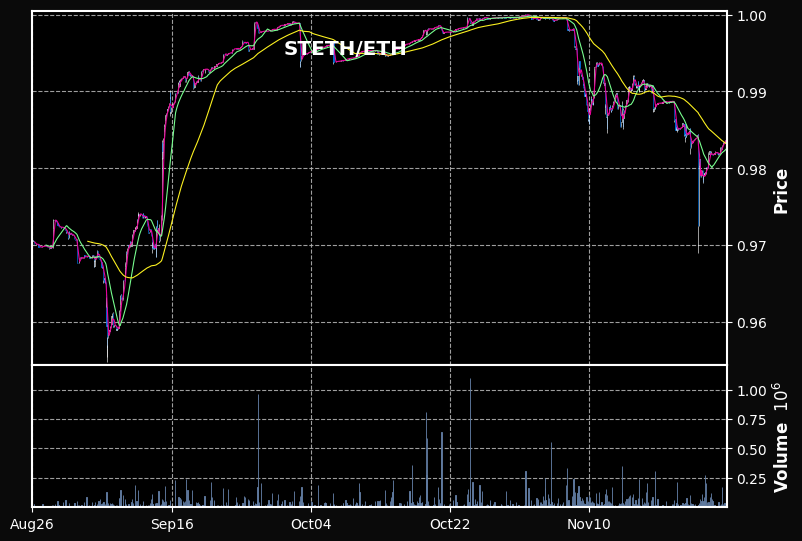

In [53]:
# oooooo fancy :)
def fancy_plot(
    data,
    mav=(10, 50),
    plt_type='candle',
    volume=True,
    datetime_format='%b%d',
    xrotation=0,
    tight_layout=True,
    style='mike', # mpf.available_styles() to pick your fav
    **kwargs
):
    mpf.plot(
        data,
        warn_too_much_data=2500,
        mav=mav,
        type=plt_type,
        volume=volume,
        datetime_format=datetime_format,
        xrotation=xrotation,
        tight_layout=tight_layout,
        style=style,
        **kwargs
    )

title="STETH/ETH"
fancy_plot(query_swaps_ohlcv, mav=(10, 50, 200), title=title)


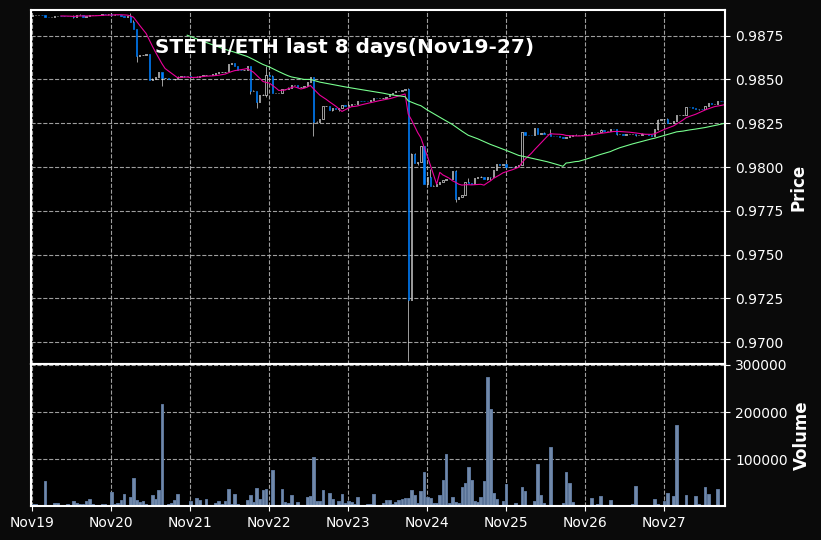

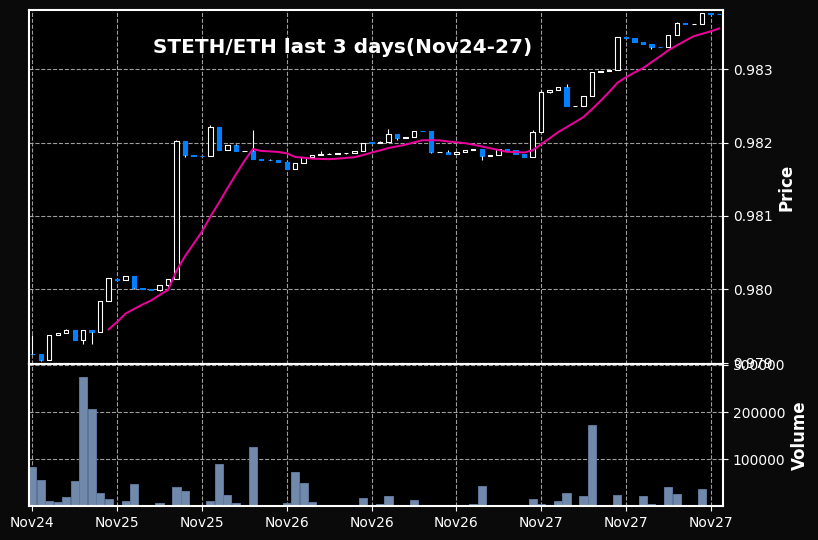

In [54]:
def plot_last_n_days(data, num_days_back=100, **kwargs):
    endPeriod = query_swaps_ohlcv.index[-1]
    startPeriod = endPeriod - pd.Timedelta(days=num_days_back)
    dataToPlot = data.loc[(data.index > startPeriod) & (data.index < endPeriod),:]
    title=f"STETH/ETH last {num_days_back} days"
    title+=f"({startPeriod:%b%d}-{endPeriod:%b%d})" if startPeriod.month != endPeriod.month else f"({startPeriod:%b%d}-{endPeriod:%d})"
    mav = [10]
    if num_days_back > 3:
        mav.append(50)
    if num_days_back > 10:
        mav.append(100)
    fancy_plot(dataToPlot, mav=mav, title=title)

plot_last_n_days(query_swaps_ohlcv, num_days_back=8)
plot_last_n_days(query_swaps_ohlcv, num_days_back=3)
